Hanel et al., iScience 2025

## Fig. 7
- Correlation btw. model-predicted Pd and data-derived Pd

In [1]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(scales)
library(knitr)
library(viridis)
library(circlize)
library(RColorBrewer)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

set.seed(333) 
Sys.time()


Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘matrixStats’


The following object is masked from

[1] "2025-09-24 19:15:10 EEST"

In [2]:
df = read.table ("./data/Pd_vs_Pd_corrected_Sept25.txt", sep =  "\t",
                header=TRUE)
head(df)

,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,HSC-2,0.04402435,HSC2,5.854351,39.02753
2,2,MPP-1,0.05121577,MPP-1,7.975693,36.59153
3,3,MPP-2,0.06188620,MPP-2,10.821541,54.70126
4,4,MPP-MEP,0.05739775,MEP-MPP,14.653905,63.50822
5,5,LMPP-1,0.09347260,LMPP1,30.148961,76.92294
6,6,LMPP-1-cycling,0.11611801,LMPP1-cycling,25.460750,89.68359


In [3]:
unique(df$cell_type)

[1] "HSC-2"                  "MPP-1"                  "MPP-2"                 
 [4] "MPP-MEP"                "LMPP-1"                 "LMPP-1-cycling"        
 [7] "Multilin-1"             "Multilin-2"             "MEP-1"                 
[10] "MEP-2"                  "MEP-Eryth-1"            "MEP-Eryth-2"           
[13] "ERP-1"                  "ERP-2"                  "ERP-3"                 
[16] "ERP-4"                  "ERP-5"                  "ERP-6"                 
[19] "ERP-7"                  "ERP-8"                  "Erythroblast-1"        
[22] "Erythroblast-2"         "Erythroblast-3"         "MKP-early"             
[25] "MKP-late"               "CLP"                    "Pro-B-Early"           
[28] "Pro-B-1"                "Pro-B-cycling-2"        "Pro-B-Early-cycling"   
[31] "Pro-B-cycling-1"        "Transitional-B-1"       "Pro-B-2"               
[34] "pre-B"                  "B Memory-1"             "B Memory-2"            
[37] "Plasma Cell"            "CD4 TCM"                "T CD4 Naive-2"         
[40] "T CD8 Naive"            "CD8 TEM"                "MAIT"                  
[43] "NK-Mature"              "MultiLin-GMP-2"         "MultiLin-GMP-3"        
[46] "preNeu"                 "immNeu-1"               "cMOP"                  
[49] "Mono-1"                 "Mono-2"                 "Intermediate Mono-1"   
[52] "Intermediate Mono-2"    "Intermediate Mono-3"    "Classical-Mono"        
[55] "Non-Classical Mono-2"   "Myeloid intermediate 1" "Myeloid intermediate 2"
[58] "Myeloid intermediate 3" "MDP-2"                  "MDP-3"                 
[61] "MDP-5"                  "pre-DC-1"               "pre-DC-3"              
[64] "cDC1"                   "cDC2-1"                 "cDC2-2"                
[67] "pDC"                    "ASDC"

In [4]:
#Sun test

colorcode <- c(
    #HSPC
  "HSC-2"   = "#fbd1dc",  
  "MPP-1"   = "#ffb6ca",  
  "MPP-2"   = "#ff9bb9",  
  "MPP-MEP" = "#ff7ca6",   

"LMPP-1"         = "#FAD0F8", 
"LMPP-1-cycling" = "#EDB6F4",   

"Multilin-1" = "#DFD8F6", 
"Multilin-2" = "#CCC5ED",   

  "MEP-1" = "#f7ccc2",
  "MEP-2" = "#fbb9ab",
  "MEP-Eryth-1" = "#fea597",
  "MEP-Eryth-2" = "#ff9183",
  
  "ERP-1" = "#ff7b6f",
  "ERP-2" = "#fe615b",
  "ERP-3" = "#f7484a",
  "ERP-4" = "#e8383d",
  "ERP-5" = "#d62d32",
  "ERP-6" = "#c22128",
  "ERP-7" = "#ae131d",
  "ERP-8" = "#9D0717",
  
  "Erythroblast-1" = "#7d0616",
  "Erythroblast-2" = "#610412",
  "Erythroblast-3" = "#45000a",

  # MkP
  "MKP-early" = "#C4A09A",  
  "MKP-late" = "#9D7E78",  

  # Lymphoid
  "CLP" = "#DEF0F5",  
  "Pro-B-Early" = "#c8e9f0",  
  "Pro-B-1" = "#a7dde7",  
  "Pro-B-cycling-2" = "#80d0de",  
  "Pro-B-Early-cycling" = "#5cc7d6",  
  "Pro-B-cycling-1" = "#42bace",  
  "Transitional-B-1" = "#3bafc7",  
  "Pro-B-2" = "#318cb4",  
  "pre-B" = "#276C9B",  
  "B Memory-1" = "#1F4C83",  
  "B Memory-2" = "#173B69",  
  "Plasma Cell" = "#0C2048",  

  # T & NK
  "CD4 TCM" = "#4D0038",  
  "T CD4 Naive-2" = "#6C2E44",  
  "T CD8 Naive" = "#8C5968",  
  "CD8 TEM" = "#522E48",  
  "MAIT" = "#6C7469",  
  "NK-Mature" = "#53424d",  

  "MultiLin-GMP-2" = "#e5dbce",  
  "MultiLin-GMP-3" = "#D2BFAF",  
    
  "preNeu"    = "#d4cfc9",  
  "immNeu-1"  = "#b8b0a8",  

  # Myeloid 
  "cMOP" = "#F0D4BA",  
  "Mono-1" = "#E0B89F",  
  "Mono-2" = "#D29773",  
  "Intermediate Mono-1" = "#C5794C",  
  "Intermediate Mono-2" = "#B75926",  
  "Intermediate Mono-3" = "#983306",  
  "Classical-Mono" = "#761706",  
  "Non-Classical Mono-2" = "#590007",  
  "Myeloid intermediate 1" = "#F5ECD7",  
  "Myeloid intermediate 2" = "#FBE4CA",  
  "Myeloid intermediate 3" = "#F5DBBF",  

  # DCs
  "MDP-2"     = "#ffcec2", 
  "MDP-3"     = "#f3b9ad",
  "MDP-5"     = "#e5a499",
  "pre-DC-1"  = "#d78e83",
  "pre-DC-3"  = "#c7786c",
  "cDC1"      = "#b26358",
  "cDC2-1"    = "#97504d",
  "cDC2-2"    = "#7a3e3e",
  "pDC" = "#BC4F57",    
  "ASDC" = "#C46A71"

)

labelorder <- names(colorcode)


In [5]:
head(df)

,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,HSC-2,0.04402435,HSC2,5.854351,39.02753
2,2,MPP-1,0.05121577,MPP-1,7.975693,36.59153
3,3,MPP-2,0.06188620,MPP-2,10.821541,54.70126
4,4,MPP-MEP,0.05739775,MEP-MPP,14.653905,63.50822
5,5,LMPP-1,0.09347260,LMPP1,30.148961,76.92294
6,6,LMPP-1-cycling,0.11611801,LMPP1-cycling,25.460750,89.68359


In [6]:
d = read_csv ("./data/total_gene_conc_data4.csv")

Rows: 544 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): sample, cell_type
dbl (18): totalE2F_norm_sum, totalRB_norm_sum, totalRB1_norm_sum, totalCDKN_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
cor_test <- cor.test(df$Pd, df$Pd_Geommean_E2F.CDK24, method = "pearson")
r_value <- cor_test$estimate
p_value <- cor_test$p.value

r_value
p_value

cor 
0.682369

[1] 1.473352e-10

`geom_smooth()` using formula = 'y ~ x'


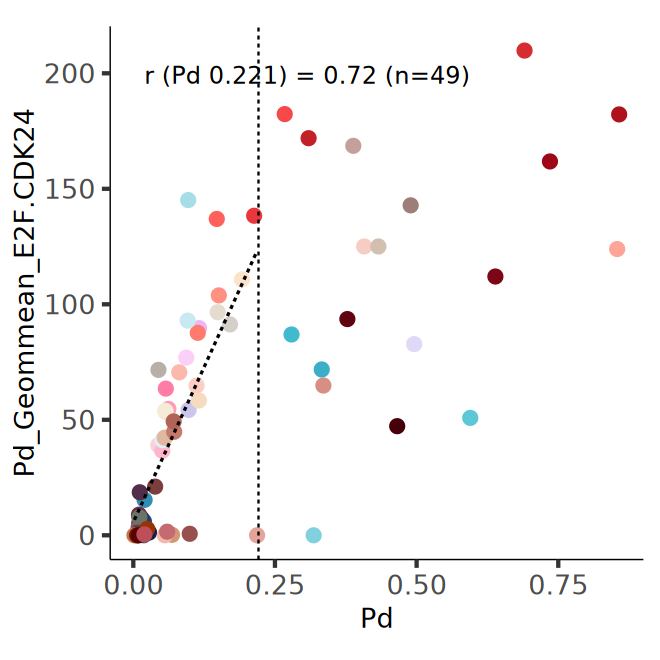

In [10]:
# Pd cutoff based on Jenks
cutoff <- 0.2205019
df$Pd <- as.numeric(df$Pd)

df_fit <- subset(df, Pd <= cutoff)

# correlation on subset
r_value_fit <- cor(df_fit$Pd, df_fit$Pd_Geommean_E2F.CDK24, 
                   method = "pearson")

scatter_plot <- ggplot(df, 
                       aes(x = Pd, 
                           y = Pd_Geommean_E2F.CDK24, 
                           color = cell_type)) +
  geom_point(size = 3.5, stroke = 0.5) +
  geom_vline(xintercept = cutoff, linetype = "dashed", color = "black", linewidth = 0.5) +
  geom_smooth(data = df_fit, aes(x = Pd, y = Pd_Geommean_E2F.CDK24),
              method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.7) +
  annotate("text", 
           x = min(df$Pd) + 0.02 * (max(df$Pd) - min(df$Pd)), 
           y = max(df$Pd_Geommean_E2F.CDK24) - 0.05 * (max(df$Pd_Geommean_E2F.CDK24) - min(df$Pd_Geommean_E2F.CDK24)),
           label = paste0("r (Pd ", round(cutoff, 3), ") = ", round(r_value_fit, 2),
                          " (n=", nrow(df_fit), ")"), 
           size = 5, hjust = 0) +
  scale_color_manual(values = colorcode) +
  theme_classic(base_size = 20, base_family = "sans") +
  theme(
    aspect.ratio = 1, 
    axis.text = element_text(size = 16), 
    axis.title = element_text(size = 16), 
    axis.title.y = element_text(vjust = 1.5),
    plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
    legend.title = element_text(color = "black", size = 18, face = "bold"), 
    legend.text = element_text(color = "black", size = 18),
    axis.line.x = element_line(size = 0.3),
    axis.line.y = element_line(size = 0.3)
  ) +
  labs(color = "Cell type") +
  guides(color = guide_legend(
    title = "Cell type",
    override.aes = list(shape = 22, size = 5, stroke = 0)
  ))

fig(5.5, 5.5)
scatter_plot <- scatter_plot + theme(legend.position = "none")
scatter_plot


In [11]:
ggsave("./data/Revision_HCAscatter_plot_PdvsPd_24th.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)

`geom_smooth()` using formula = 'y ~ x'


In [13]:
ggsave("./data/Revision_HCA_scatter_plot_PdvsPd_corrected_Sept25.pdf", 
       scatter_plot, width = 5.5, height = 5.5, 
       units = "in", useDingbats = FALSE)

In [14]:
head(d, n=4)

sample,totalE2F_norm_sum,totalRB_norm_sum,totalRB1_norm_sum,totalCDKN_norm_sum,totalCDKN1_norm_sum,totalCDK246_norm_sum,totalCDK46_norm_sum,totalCCNE_norm_sum,totalE2F_raw,totalRB_raw,totalRB1_raw,totalCDKN_raw,totalCDKN1_raw,totalCDK246_raw,totalCDK46_raw,totalCCNE_raw,total_cells,total_RNA,cell_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BM1_ASDC,2.266032,7.107968,2.995072,43.31186,7.441048,16.74448,14.38342,0.000000,2,7,3,42,7,15,12,0,14,128299,ASDC
BM1_B Memory-1,8.829895,83.876240,55.451523,105.39577,70.382935,26.63384,24.46135,0.000000,4,34,22,39,27,11,10,0,77,292059,B Memory-1
BM1_B Memory-2,16.117620,446.131380,334.720520,575.64940,239.595960,144.05917,136.47922,1.571586,6,165,124,216,89,57,54,1,438,1654024,B Memory-2
BM1_CD4 TCM,141.363920,1682.553600,481.199980,2713.92160,1429.888700,687.82710,660.16390,19.192974,49,595,168,955,499,246,235,7,1542,5463377,CD4 TCM


In [15]:
head (df)

,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,HSC-2,0.04402435,HSC2,5.854351,39.02753
2,2,MPP-1,0.05121577,MPP-1,7.975693,36.59153
3,3,MPP-2,0.06188620,MPP-2,10.821541,54.70126
4,4,MPP-MEP,0.05739775,MEP-MPP,14.653905,63.50822
5,5,LMPP-1,0.09347260,LMPP1,30.148961,76.92294
6,6,LMPP-1-cycling,0.11611801,LMPP1-cycling,25.460750,89.68359


In [16]:
d2 <- merge(d, df[, c("cell_type", "Total_CycE", "Pd")], by = "cell_type", all.x = TRUE)
head(d2)

,cell_type,sample,totalE2F_norm_sum,totalRB_norm_sum,totalRB1_norm_sum,totalCDKN_norm_sum,totalCDKN1_norm_sum,totalCDK246_norm_sum,totalCDK46_norm_sum,totalCCNE_norm_sum,⋯,totalRB1_raw,totalCDKN_raw,totalCDKN1_raw,totalCDK246_raw,totalCDK46_raw,totalCCNE_raw,total_cells,total_RNA,Total_CycE,Pd
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASDC,BM1_ASDC,2.266032,7.107968,2.995072,43.31186,7.441048,16.74448,14.38342,0.000000,⋯,3,42,7,15,12,0,14,128299,0.07382554,0.059708
2,ASDC,BM7_ASDC,1.735810,16.647255,12.081015,79.25725,20.180103,14.73851,14.73851,1.667501,⋯,9,59,12,10,10,1,31,212133,0.07382554,0.059708
3,ASDC,BM3_ASDC,18.263346,34.044740,18.372087,173.80869,27.482666,14.99554,13.68801,9.512088,⋯,10,116,18,13,12,5,39,254625,0.07382554,0.059708
4,ASDC,BM4_ASDC,1.834862,25.099552,13.134001,52.90837,13.192905,23.28215,22.17485,0.000000,⋯,6,32,8,16,15,0,29,165164,0.07382554,0.059708
5,ASDC,BM5_ASDC,8.100945,33.253746,18.032885,134.00858,32.064240,39.45338,32.30125,4.544684,⋯,14,98,22,35,29,4,50,365020,0.07382554,0.059708
6,ASDC,BM6_ASDC,0.000000,10.370359,6.036059,45.46402,14.752262,25.62953,24.38837,1.241157,⋯,3,27,8,17,16,1,23,143945,0.07382554,0.059708


In [17]:
df_filtered <- d2 %>%
  filter(grepl("ERP", cell_type))
head(df_filtered)

,cell_type,sample,totalE2F_norm_sum,totalRB_norm_sum,totalRB1_norm_sum,totalCDKN_norm_sum,totalCDKN1_norm_sum,totalCDK246_norm_sum,totalCDK46_norm_sum,totalCCNE_norm_sum,⋯,totalRB1_raw,totalCDKN_raw,totalCDKN1_raw,totalCDK246_raw,totalCDK46_raw,totalCCNE_raw,total_cells,total_RNA,Total_CycE,Pd
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ERP-1,BM8_ERP-1,9.429781,20.541689,11.825973,30.012255,11.922373,149.848650,139.430270,0.0000000,⋯,13,36,13,173,161,0,47,518584,77.67184,0.1137503
2,ERP-1,BM2_ERP-1,0.000000,1.336059,1.336059,1.336059,0.000000,5.158597,5.158597,0.6216199,⋯,2,2,0,8,8,1,3,40565,77.67184,0.1137503
3,ERP-1,BM6_ERP-1,6.121616,4.638504,1.945925,4.293149,1.502832,94.572845,89.712740,1.5269506,⋯,3,5,2,110,104,1,17,199408,77.67184,0.1137503
4,ERP-1,BM5_ERP-1,11.707006,37.520256,26.833231,36.931200,7.987500,270.289950,256.281520,2.8448465,⋯,30,43,9,325,309,4,71,842468,77.67184,0.1137503
5,ERP-1,BM3_ERP-1,11.963382,15.362229,8.666206,20.064081,6.266966,88.174680,82.785830,2.7076306,⋯,12,29,10,124,116,4,33,463355,77.67184,0.1137503
6,ERP-1,BM7_ERP-1,6.304394,9.285058,6.990804,16.426456,3.505454,77.780655,75.989680,0.8076892,⋯,8,19,4,89,87,1,19,203488,77.67184,0.1137503


In [18]:
#
#mean_ccne_by_celltype <- df_filtered %>%
#  group_by(cell_type) %>%
#  summarise(mean_avgCCNE = mean(totalCCNE_norm_sum/total_cells, na.rm = TRUE))
#

In [19]:
mean_ccne_by_celltype <- df_filtered %>%
  group_by(cell_type) %>%
  summarise(
    mean_avgCCNE = mean(totalCCNE_norm_sum / total_cells, na.rm = TRUE),
    mean_Pd = mean(Pd, na.rm = TRUE)
  )


In [20]:
head(mean_ccne_by_celltype)

cell_type,mean_avgCCNE,mean_Pd
<chr>,<dbl>,<dbl>
ERP-1,0.05770686,0.1137503
ERP-2,0.08674493,0.1473136
ERP-3,0.27979034,0.2672396
ERP-4,0.10639231,0.2132975
ERP-5,0.31889242,0.6904662
ERP-6,0.49324914,0.3093927


In [21]:
df_ery = df %>%
 filter(grepl("ERP", cell_type))

In [22]:
head(df_ery)

,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,13,ERP-1,0.1137503,ERP1,77.67184,87.65256
2,14,ERP-2,0.1473136,ERP2,77.45793,136.95952
3,15,ERP-3,0.2672396,ERP3,145.18953,182.33554
4,16,ERP-4,0.2132975,ERP4,94.62399,138.33751
5,17,ERP-5,0.6904662,ERP5,186.62080,209.84338
6,18,ERP-6,0.3093927,ERP6,153.55652,171.91153


In [23]:
df_ery <- df_ery %>%
  add_column(mean_avgCCNE = mean_ccne_by_celltype$mean_avgCCNE) %>%
add_column (mean_Pd = mean_ccne_by_celltype$mean_Pd)

head(df_ery, n=3)


,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24,mean_avgCCNE,mean_Pd
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,13,ERP-1,0.1137503,ERP1,77.67184,87.65256,0.05770686,0.1137503
2,14,ERP-2,0.1473136,ERP2,77.45793,136.95952,0.08674493,0.1473136
3,15,ERP-3,0.2672396,ERP3,145.18953,182.33554,0.27979034,0.2672396


In [25]:
head(df_ery)

,X,cell_type,Pd,cell_type_Sylvain,Total_CycE,Pd_Geommean_E2F.CDK24,mean_avgCCNE,mean_Pd
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,13,ERP-1,0.1137503,ERP1,77.67184,87.65256,0.05770686,0.1137503
2,14,ERP-2,0.1473136,ERP2,77.45793,136.95952,0.08674493,0.1473136
3,15,ERP-3,0.2672396,ERP3,145.18953,182.33554,0.27979034,0.2672396
4,16,ERP-4,0.2132975,ERP4,94.62399,138.33751,0.10639231,0.2132975
5,17,ERP-5,0.6904662,ERP5,186.62080,209.84338,0.31889242,0.6904662
6,18,ERP-6,0.3093927,ERP6,153.55652,171.91153,0.49324914,0.3093927


`geom_smooth()` using formula = 'y ~ x'


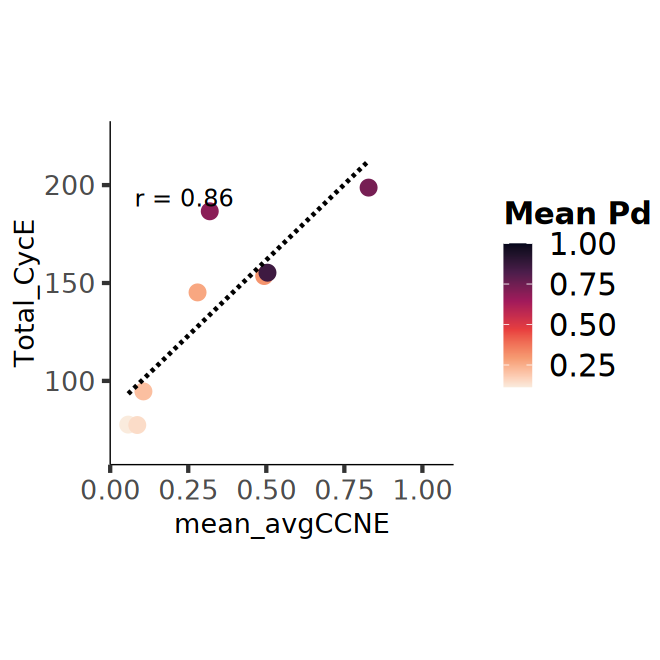

In [27]:
library(viridis)

r_value <- cor(df_ery$mean_avgCCNE, df_ery$Total_CycE, method = "pearson")

scatter_plot <- ggplot(df_ery, 
                       aes(x = mean_avgCCNE, 
                           y = Total_CycE, 
                           color = Pd)) +
  geom_point(size = 4, stroke = 0.5) + 
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", size = 1) +
  annotate("text", 
           x = min(df_ery$mean_avgCCNE, na.rm = TRUE) + 0.02, 
           y = max(df_ery$Total_CycE, na.rm = TRUE) - 5, 
           label = paste0("r = ", round(r_value, 2)), 
           size = 5, hjust = 0) +
  scale_color_viridis_c(
    option = "rocket", 
    direction = -1, 
    limits = c(min(df_ery$Pd, na.rm = TRUE), 1)
  ) +
  scale_x_continuous(limits = c(0, 1.1), expand = c(0, 0)) +
  scale_y_continuous(expand = expansion(mult = c(0.15, 0.15))) +
  theme_classic(base_size = 20, base_family = "sans") +
  theme(
    aspect.ratio = 1, 
    axis.text = element_text(size = 16), 
    axis.title = element_text(size = 16), 
    axis.title.y = element_text(vjust = 1.5),
    plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
    legend.title = element_text(color = "black", size = 18, face = "bold"), 
    legend.text = element_text(color = "black", size = 18),
    axis.line.x = element_line(size = 0.3),
    axis.line.y = element_line(size = 0.3)
  ) +
  labs(color = "Mean Pd")

scatter_plot


`geom_smooth()` using formula = 'y ~ x'


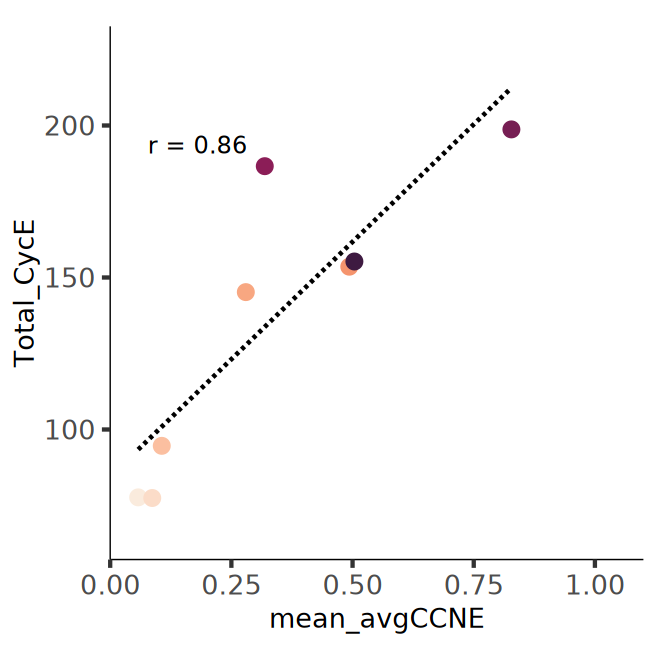

In [28]:
fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot